In [1]:
%matplotlib inline
from msslib.prepare import *
from msslib.sample import *
from msslib.features import *
from msslib.cluster import *
import matplotlib.pyplot as plt
from scipy.cluster import vq
import functools as f
from collections import Counter

In [2]:
img_path = "/home/finlay/HMT/original_images/VenetusA/VA183VN-0685.jpg"
label_path = "/home/finlay/HMT/data/VenetusA/region_img/VA183VN-0685.png"
page_path = "/home/finlay/HMT/data/VenetusA/region_xml/VA183VN-0685.xml"

In [4]:
# Define the size of window for samples
window_size = 41
# Initialise a weighting function for this window size
weighter = gaussian_weighter(window_size)
# Initialise a function to get a window of this size from an image
windower = f.partial(win_centred_on, window=window_size)
# Initialise a function to shift a point to accomodate a border from this window size. 
shifter = f.partial(point_shift, window=window_size)
# Initialise a scaling function for images. 
resizer = img_resizer((1200,900))
# Define the sampling function
make_observations = compose(prepare_features, real_fft, weighter, std_dev_contrast_stretch)
# Open the two images 
img, label = open_image_label(page_path, img_path, label_path)
# Scale both images down
img, label = resizer(img, label)

# Create an image for sampling with FFT 
f_img = prepare_fft_image(img, window_size)

#define methods to access images.
access_img = img_accessor(img, identity)
access_label = img_accessor(label, identity)
access_f_img = img_accessor(f_img, compose(windower, shifter))


In [5]:
def most_common(l):
    c = Counter(l)
    if len(c) == 1:
        return c.most_common(1)[0][0]
    else:
        return 80

In [10]:
#def samples_in_window(window)
new_img = np.zeros_like(label)
i = 0
for w in win_iter((1200,900),(20,20),20):
    block_obs = take_n_samples(10, random_point_in_window(w), compose(make_observations, access_f_img))
    np.asarray(block_obs)
    #new_img[w] = most_common(take_n_samples(10, random_point_in_window(w), access_label))
    #new_img[w] = take_n_samples(10, coord_in_window, compose(make_observations, access_f_img))
    

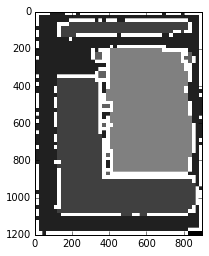

In [25]:
plt.imshow(new_img, cmap='gray')

In [16]:
np.unique(new_img)

array([ 0, 10, 20, 30, 40], dtype=uint8)

In [ ]:
plt.imshow(new_img1)

In [ ]:
plt.imshow(img)